In [70]:
''' 
-supervised learning python 2
-netflix sotck data
The features are the descriptive attributes
and the label is what you're attempting to predict or forecast.
As such, our features are actually: current price, 
high minus low percent, and the percent change volatility.
'''
import quandl
import pandas as pd
csv_obj = quandl.get("WIKI/nflx")
#csv_obj = pd.read_csv('nflx.csv',  encoding='utf-8-sig')
#csv_obj

In [71]:
#new col: HL_PCT high - low percent
csv_obj["HL_PCT"]= (csv_obj["Adj. High"] - csv_obj["Adj. Close"]) / csv_obj['Adj. Close'] * 100.0
#new col: pct chane new - old / old * 100
csv_obj["PCT_DALY_CHANGE"]= (csv_obj["Adj. Close"] - csv_obj["Adj. Open"]) / csv_obj['Adj. Open'] * 100.0


In [72]:
 
csv_obj = csv_obj[["Adj. Close","HL_PCT","PCT_DALY_CHANGE", "Volume"]]
#featurs


In [73]:
#prediction_col
forecast_col = 'Adj. Close'
#replacing NAN data
csv_obj.fillna(-99999, inplace=True)


In [74]:
import math
#We're saying we want to forecast out 1% of the entire length of the dataset. 
#using data to forecast 10 days into the future
forecast_out = int(math.ceil(0.01*len(csv_obj)))#math.celi rounds up to the nearest whole
forecast_out

38

In [75]:
csv_obj['label'] = csv_obj[forecast_col].shift(-forecast_out)


In [76]:
import numpy as np

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [77]:
X = np.array(csv_obj.drop(['label'],1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]

X = X[:-forecast_out:]




csv_obj.dropna(inplace=True)


In [78]:
#featurs
#X = np.array(csv_obj.drop(['label'], 1))
y = np.array(csv_obj['label'])


In [79]:
#X = preprocessing.scale(X)
#y = np.array(csv_obj['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [80]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [81]:
confidence = clf.score(X_test, y_test)
confidence

0.96395867152715953

(array([ 129.37189224,  131.26513449,  131.07199328,  132.05040488,
        131.50646951,  131.92751509,  134.23383715,  131.78046749,
        131.37473138,  129.59338527,  132.55703424,  134.85615722,
        137.03489171,  136.03736997,  136.81582927,  135.67279001,
        136.37944073,  135.03182777,  138.84230143,  137.75142553,
        138.07896268,  141.3261737 ,  144.13782796,  143.27214813,
        146.06297899,  145.50485193,  145.14658629,  148.41232764,
        147.12085246,  147.30178947,  147.06980487,  145.88643406,
        146.99034828,  147.73223687,  149.96700964,  151.03985638,
        150.83263082,  151.36896597]), 0.96395867152715953, 38)


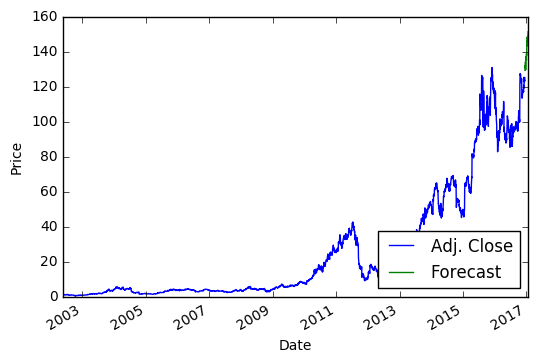

In [82]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime, time

forecast_set = clf.predict(X_lately)
csv_obj['Forecast'] = np.nan

print(forecast_set, confidence, forecast_out)


last_date = csv_obj.iloc[-1].name
last_unix = time.mktime(last_date.timetuple())
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    csv_obj.loc[next_date] = [np.nan for _ in range(len(csv_obj.columns)-1)]+[i]

csv_obj['Adj. Close'].plot()
csv_obj['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()